In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['font.size'] = 14

In [2]:
NFFT = 2**14
f0 = 8425e6
t0 = np.datetime64('2023-09-24T14:35:47.139944')
fs = 61.44e6
n_int = 938
x = np.fromfile('waterfall/ORX_2023-09-24T14_35_35_waterfall_0x', 'float32').reshape(-1, NFFT)
t = t0 + np.arange(x.shape[0]) * (1e9 * n_int * NFFT/ fs) * np.timedelta64(1, 'ns')

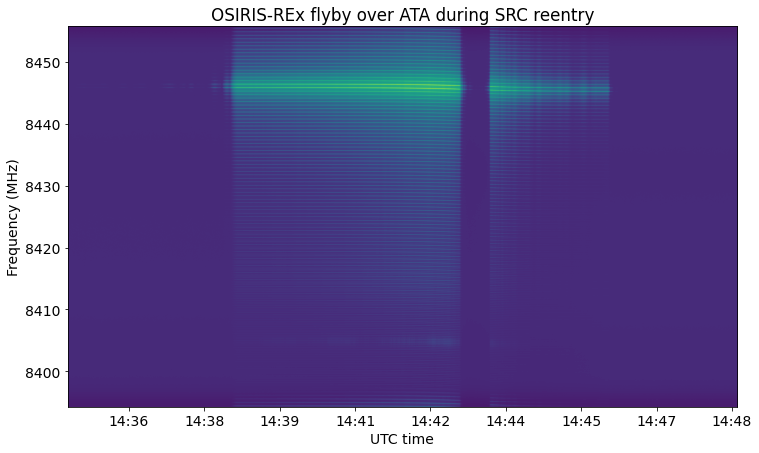

In [3]:
plt.figure(figsize=(12, 7))
a = mdates.date2num(t0)
b = mdates.date2num(t0 + (x.shape[0] * 1e9 * n_int * NFFT / fs) * np.timedelta64(1, 'ns'))
plt.imshow(10*np.log10(x).T[::-1], aspect='auto', extent=[a, b, 1e-6*(f0 - fs/2), 1e-6*(f0 + fs/2)],
           vmin=25, vmax=95)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.ylabel('Frequency (MHz)')
plt.xlabel('UTC time')
plt.title('OSIRIS-REx flyby over ATA during SRC reentry');

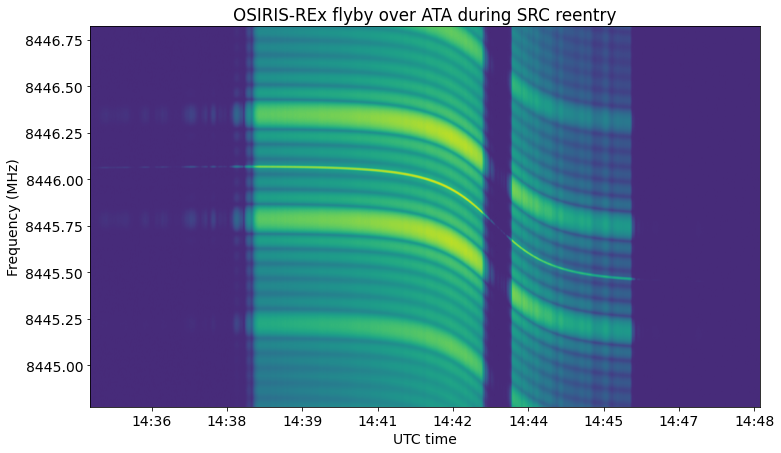

In [4]:
plt.figure(figsize=(12, 7))
a = mdates.date2num(t0)
b = mdates.date2num(t0 + (x.shape[0] * 1e9 * n_int * NFFT / fs) * np.timedelta64(1, 'ns'))
plt.imshow(10*np.log10(x).T[::-1], aspect='auto', extent=[a, b, 1e-6*(f0 - fs/2), 1e-6*(f0 + fs/2)],
           vmin=25, vmax=95)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.ylabel('Frequency (MHz)')
plt.xlabel('UTC time')
delta_f = 1.024
fcenter = 8445.8
plt.ylim(fcenter - delta_f, fcenter + delta_f)
plt.title('OSIRIS-REx flyby over ATA during SRC reentry');

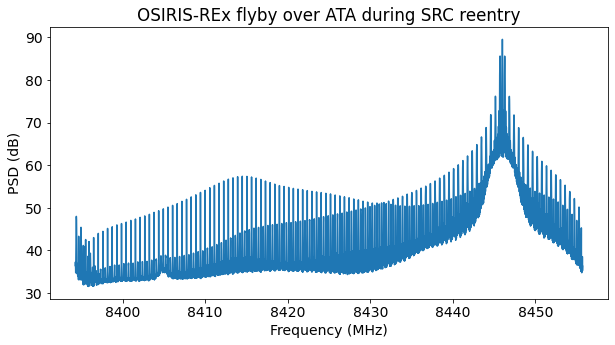

In [5]:
faxis = 1e-6 * (f0 + np.fft.fftshift(np.fft.fftfreq(NFFT, 1/fs)))
plt.plot(faxis, 10*np.log10(x[x.shape[0]//2]))
plt.title('OSIRIS-REx flyby over ATA during SRC reentry')
plt.xlabel('Frequency (MHz)')
plt.ylabel('PSD (dB)');

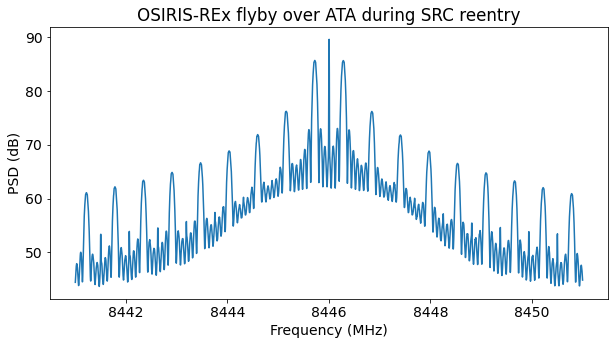

In [6]:
fspan = 10
fsel = (faxis >= 8446 - fspan/2) & (faxis <= 8446 + fspan/2)
plt.plot(faxis[fsel], 10*np.log10(x[x.shape[0]//2, fsel]))
plt.title('OSIRIS-REx flyby over ATA during SRC reentry')
plt.xlabel('Frequency (MHz)')
plt.ylabel('PSD (dB)');